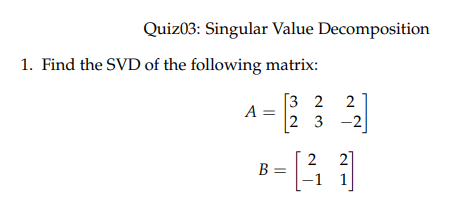

In [1]:
import numpy as np
A = np.array([[3,2,-2],[2,3,-2]])
A

array([[ 3,  2, -2],
       [ 2,  3, -2]])

In [6]:
U,d,VT = np.linalg.svd(A)
print(f'The orthogonal matrix m x m is : \n {U} \n')
print(f'The diagonal vector is : \n{d} \n')
print(f'Diagonal matrix m x n: \n {np.diag(d)} \n')
print(f'The orthogonal matrix n x n is : \n {VT} \n')

The orthogonal matrix m x m is : 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] 

The diagonal vector is : 
[5.74456265 1.        ] 

Diagonal matrix m x n: 
 [[5.74456265 0.        ]
 [0.         1.        ]] 

The orthogonal matrix n x n is : 
 [[-6.15457455e-01 -6.15457455e-01  4.92365964e-01]
 [-7.07106781e-01  7.07106781e-01  6.17600560e-17]
 [ 3.48155312e-01  3.48155312e-01  8.70388280e-01]] 



In [3]:
B = np.array([[2,2],[-1,1]])
B

array([[ 2,  2],
       [-1,  1]])

In [7]:
U,d,VT = np.linalg.svd(B)
print(f'The orthogonal matrix m x m is : \n {U} \n')
print(f'The diagonal vector is : \n{d} \n')
print(f'Diagonal matrix m x n: \n {np.diag(d)} \n')
print(f'The orthogonal matrix n x n is : \n {VT} \n')

The orthogonal matrix m x m is : 
 [[-1.00000000e+00  1.11022302e-16]
 [ 1.11022302e-16  1.00000000e+00]] 

The diagonal vector is : 
[2.82842712 1.41421356] 

Diagonal matrix m x n: 
 [[2.82842712 0.        ]
 [0.         1.41421356]] 

The orthogonal matrix n x n is : 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] 



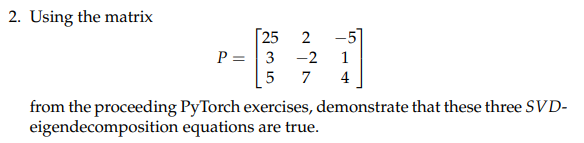

In [19]:
import torch 
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4]]).float()

# compute SVD of P
U,S,V = torch.svd(P)

# compute V * sigma^2 * V(tranpose)
V_SVT = V.mm(torch.diag(S**2)).mm(V.t())

# compute P(transpose) * P
PTP = P.t().mm(P)

In [20]:
# compute V * sigma^2 * V^T and P^T * P
print(torch.allclose(V_SVT,PTP))

True


In [21]:
# Compute U * sigma^2 * U(transpose)
U_SUT = U.mm(torch.diag(S**2)).mm(U.t())

# Compute P * P^T
PPT = P.mm(P.t())

# Compare U * sigma^2 * U(transpose) and P * P(transpose)
print(torch.allclose(U_SUT,PPT))

True


In [22]:
# Compute U*sigma * V(transpose)
USVT = U.mm(torch.diag(S)).mm(V.t())

# Compute U * sigma * V(transpose)
print(torch.allclose(USVT,P))

True


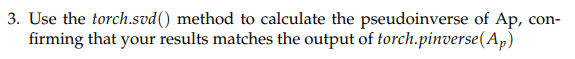

In [33]:
# Define a matrix Ap
Ap = torch.tensor([[1, 2], [3, 4], [5, 6]]).float()

# Compute the SVD of Ap
U, S, V = torch.svd(Ap)
print(U,'\n')
print(S,'\n')
print(V,'\n')

tensor([[-0.2298,  0.8835],
        [-0.5247,  0.2408],
        [-0.8196, -0.4019]]) 

tensor([9.5255, 0.5143]) 

tensor([[-0.6196, -0.7849],
        [-0.7849,  0.6196]]) 



In [34]:
# Compute the pseudoinverse using the SVD
pseudoinv = V.mm(torch.diag(1/S)).mm(U.t())
pseudoinv

tensor([[-1.3333, -0.3333,  0.6667],
        [ 1.0833,  0.3333, -0.4167]])

In [35]:
pinv = torch.pinverse(Ap)
print(pinv)

tensor([[-1.3333, -0.3333,  0.6667],
        [ 1.0833,  0.3333, -0.4167]])


In [36]:
# Compare with the output of torch.pinverse()
print(torch.allclose(pseudoinv, pinv))

True


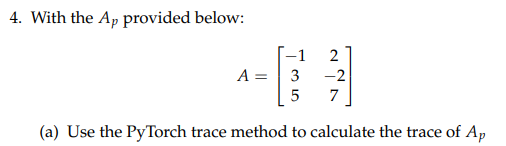

In [49]:
Ap = torch.tensor([[-1, 2],
                   [3,-2],
                   [5, 7]]).float()
Ap

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [50]:
trace = torch.trace(Ap)
trace

tensor(-3.)

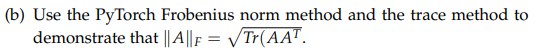

In [51]:
# Compute the Frobenius norm of A
normAp = torch.norm(Ap, p='fro')
print(normAp)

tensor(9.5917)


In [52]:
# Compute AAT
AAT = Ap.mm(Ap.t())
AAT

tensor([[ 5., -7.,  9.],
        [-7., 13.,  1.],
        [ 9.,  1., 74.]])

In [53]:
# Compute the trace of AAT
traceAAT = torch.trace(AAT)
traceAAT

tensor(92.)

In [54]:
# Compute the square root of the trace of AAT
sqrt_traceAAT = torch.sqrt(traceAAT)
sqrt_traceAAT

tensor(9.5917)

In [55]:
# Compare the two results
print(torch.allclose(normAp, sqrt_traceAAT))

True
